# MNIST-Neural Network from scratch (without using Tensorflow/Pytorch)

###### Importing Libraries

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

###### Reading the data from CSV file

In [21]:
data = pd.read_csv("Data/train.csv")

In [22]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Initializing the data

In [23]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_,m_train = X_train.shape

In [24]:
Y_train

array([8, 2, 4, ..., 7, 0, 1], dtype=int64)

###### Neural Network

In [46]:
def initializeParameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forwardPropagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLUDerivative(Z):
    return Z > 0

def oneHotEncoding(Y):
    oneHotY = np.zeros((Y.size, Y.max() + 1))
    oneHotY[np.arange(Y.size), Y] = 1
    oneHotY = oneHotY.T
    return oneHotY

def backPropagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    oneHotY = oneHotEncoding(Y)
    dZ2 = A2 - oneHotY
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLUDerivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1/ m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def updateParameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [52]:
def getPredictions(A2):
    return np.argmax(A2, 0)

def accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradientDescent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initializeParameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forwardPropagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backPropagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateParameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = getPredictions(A2)
            print("Accuracy: ", accuracy(predictions, Y))
    return W1, b1, W2, b2

In [53]:
W1, b1, W2, b2 = gradientDescent(X_train, Y_train, 0.10, 000)
print("Done")

Iteration:  0
[4 5 4 ... 4 7 4] [8 2 4 ... 7 0 1]
0.09973170731707318
Iteration:  100
[4 2 4 ... 7 0 1] [8 2 4 ... 7 0 1]
0.4968048780487805
Iteration:  200
[4 2 4 ... 7 0 1] [8 2 4 ... 7 0 1]
0.6625609756097561
Iteration:  300
[4 2 4 ... 7 0 1] [8 2 4 ... 7 0 1]
0.7240731707317073
Iteration:  400
[8 2 4 ... 7 0 1] [8 2 4 ... 7 0 1]
0.7560487804878049
Iteration:  500
[8 2 4 ... 7 0 8] [8 2 4 ... 7 0 1]
0.7791463414634147
Iteration:  600
[8 2 4 ... 7 0 8] [8 2 4 ... 7 0 1]
0.7968048780487805
Iteration:  700
[8 2 4 ... 7 0 8] [8 2 4 ... 7 0 1]
0.8123414634146342
Iteration:  800
[8 2 4 ... 7 0 8] [8 2 4 ... 7 0 1]
0.8265365853658536
Iteration:  900
[8 2 4 ... 7 0 8] [8 2 4 ... 7 0 1]
0.8394634146341463
Iteration:  1000
[8 2 4 ... 7 0 8] [8 2 4 ... 7 0 1]
0.849390243902439
Iteration:  1100
[8 2 4 ... 7 0 8] [8 2 4 ... 7 0 1]
0.8577317073170732
Iteration:  1200
[9 2 4 ... 7 0 8] [8 2 4 ... 7 0 1]
0.8639756097560976
Iteration:  1300
[5 2 4 ... 7 0 8] [8 2 4 ... 7 0 1]
0.8691219512195122
Iter

In [59]:
def makePredictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardPropagation(W1, b1, W2, b2, X)
    predictions = getPredictions(A2)
    return predictions

def testPrediction(index, W1, b1, W2, b2):
    currentImage = X_train[:, index, None]
    prediction = makePredictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    currentImage = currentImage.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(currentImage, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


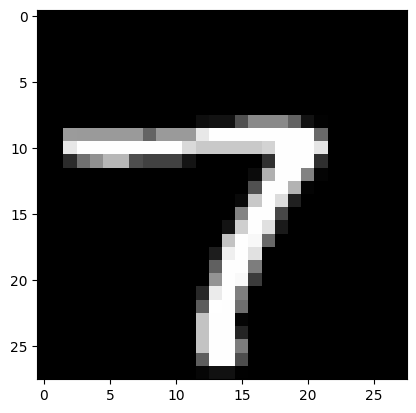

Prediction:  [0]
Label:  0


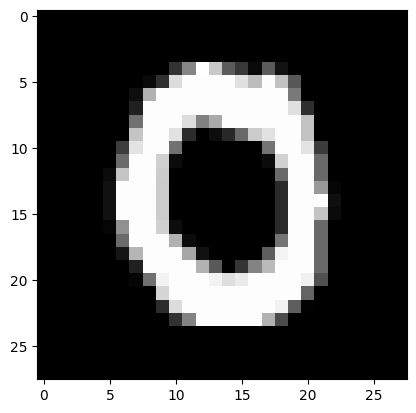

Prediction:  [2]
Label:  2


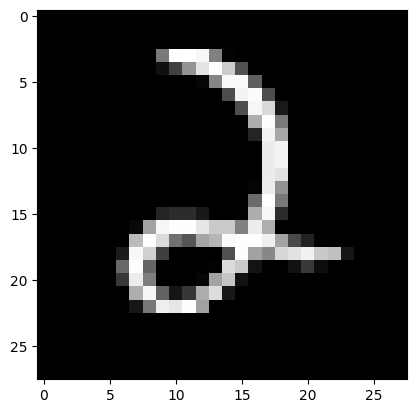

Prediction:  [4]
Label:  6


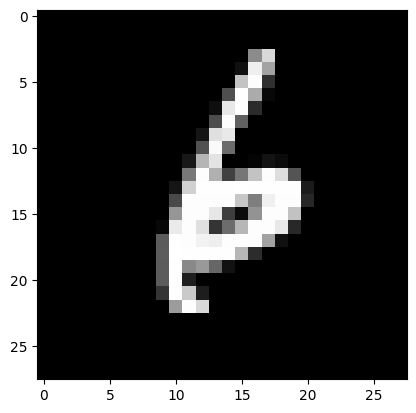

Prediction:  [7]
Label:  7


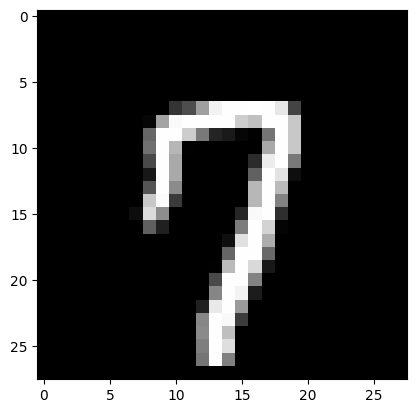

Prediction:  [2]
Label:  2


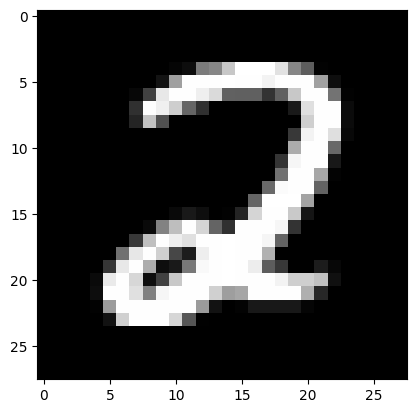

Prediction:  [1]
Label:  1


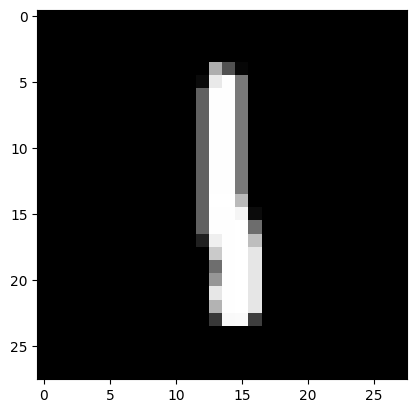

Prediction:  [4]
Label:  4


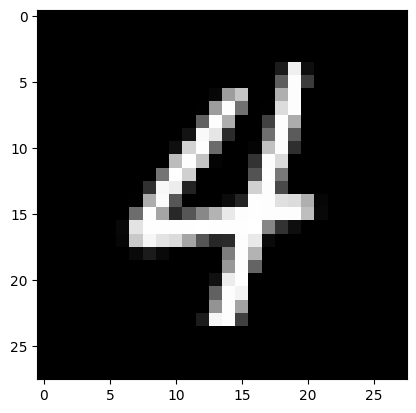

Prediction:  [0]
Label:  0


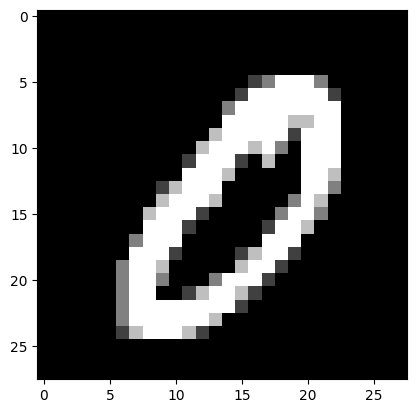

Prediction:  [2]
Label:  2


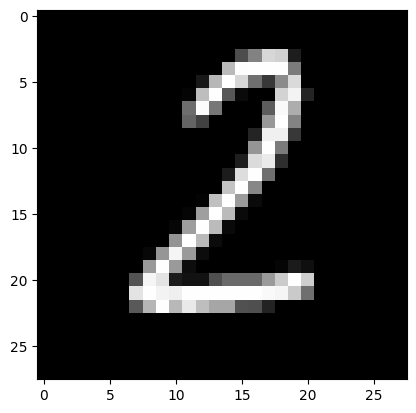

In [65]:
startingIndex = 500
numberOfPredictions = 10
for i in range(startingIndex, startingIndex + numberOfPredictions):
    testPrediction(i, W1, b1, W2, b2)

In [69]:
dev_predictions = makePredictions(X_dev, W1, b1, W2, b2)
print("Accuracy = ",accuracy(dev_predictions, Y_dev)*100,"%")

[3 0 8 7 7 7 5 5 1 8 5 4 4 6 1 1 9 8 0 6 6 2 9 9 8 0 2 1 6 8 3 0 2 9 2 5 9
 2 9 8 0 8 2 5 8 4 5 5 4 3 0 7 9 2 5 0 1 8 0 7 2 9 0 4 2 9 0 6 6 5 0 8 2 0
 3 6 8 8 6 9 1 3 7 5 8 9 6 3 6 1 9 1 9 2 4 4 5 7 3 9 7 5 8 3 5 3 8 4 2 0 1
 0 5 7 0 1 6 7 2 6 6 1 7 6 1 3 2 2 6 2 1 9 2 5 5 0 6 6 1 8 3 8 7 6 2 7 1 0
 5 2 0 4 1 1 2 4 6 9 8 5 7 7 7 5 6 0 9 9 5 0 7 3 6 6 2 9 9 1 4 5 1 6 6 4 6
 1 6 7 2 7 9 8 5 2 0 4 8 3 8 9 7 0 6 9 9 3 9 3 7 7 4 3 8 6 4 6 3 3 3 4 3 1
 0 1 5 3 0 0 5 7 9 5 4 7 6 8 9 5 6 3 1 2 2 2 1 4 1 9 3 2 4 4 8 7 7 0 1 3 9
 5 4 0 5 9 2 3 2 8 6 2 7 3 7 7 8 4 1 9 6 4 1 6 2 3 9 9 4 2 6 3 7 9 6 5 0 3
 9 8 2 1 2 5 8 5 2 8 3 0 7 0 7 1 4 0 9 5 4 1 5 9 3 6 0 3 2 9 7 0 5 3 3 0 0
 0 6 7 4 8 1 9 9 6 7 9 2 0 1 4 3 7 5 0 7 2 3 0 0 5 5 3 6 1 3 5 1 1 9 7 1 3
 6 1 5 2 9 6 2 7 3 7 9 2 1 4 9 1 4 3 4 2 4 7 3 6 5 1 9 3 9 1 0 1 4 3 7 1 1
 9 1 6 6 2 7 7 6 5 7 0 2 7 7 5 6 0 5 3 0 9 2 6 7 5 6 3 6 2 6 7 7 9 8 9 5 1
 8 2 4 3 0 0 4 9 3 9 2 8 2 7 9 6 6 3 7 5 9 3 0 2 2 7 5 5 0 9 9 8 7 7 2 4 8
 9 9 5 4 7 3 4 9 2 0 2 2 